In [79]:
import pandas as pd
import os 
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"

from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, TensorBoard
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Dense, Input, Bidirectional, Conv2D, Activation, MaxPooling2D, Flatten, Reshape
from keras.layers import Conv1D, MaxPooling1D, SimpleRNN, BatchNormalization,Dropout
from keras.callbacks import ModelCheckpoint
#from keras.utils import multi_gpu_model
from keras import backend as K
K.set_image_dim_ordering('tf')

In [80]:
import os
os.listdir()

['DEMO_CODE.ipynb',
 'ROC - Fold 2.jpg',
 'Dados Normalizados_NN.npy',
 'Random.png',
 'seds_agn_allfreqs_max.npy',
 'ROC - Fold 5.jpg',
 'Train_Test',
 'Train.py',
 'Partial Derivatives.npy',
 'ROC - Fold 3.jpg',
 'Test-Copy1.ipynb',
 'Final_Model_1.0.hdf5',
 'No_LSTM.png',
 'ROC-Conv 1D.jpg',
 'seds_blazar_allsorted_2.0.npy',
 'Conv1D.png',
 'ROC - Fold 4.jpg',
 '.ipynb_checkpoints',
 'seds_blazar_allsorted.npy',
 'Dados Normalizados.npy',
 'seds_agn_allsorted.npy',
 'Test.ipynb',
 'Target.npy',
 'map_of_attention.gz.tar',
 'Map_of_Attention',
 'ROC-No LSTM.jpg',
 'utils',
 'ROC - Fold 1.jpg',
 'deep_model_plot-master',
 'Map',
 'fold1',
 'Blazar_2_0.ipynb',
 'paper',
 'fold5',
 'seds_agn_allsorted_2.0.npy',
 'fold3',
 'test-dx.npy',
 'fold4',
 'Final_Model.hdf5',
 'paper.zip',
 'seds_blazar_allfreqs_max.npy',
 'fold2',
 'Fold-Model.png',
 '[LSTM]Blazar.hdf5']

In [81]:
import numpy as np

df = np.load("seds_blazar_allfreqs_max.npy")

In [82]:
df[0,:5]

array([[3.650e+07, 0.000e+00],
       [3.520e+08, 0.000e+00],
       [8.430e+08, 0.000e+00],
       [1.400e+09, 8.778e-16],
       [4.800e+09, 1.776e-15]])

In [83]:
df.shape

(3561, 486, 2)

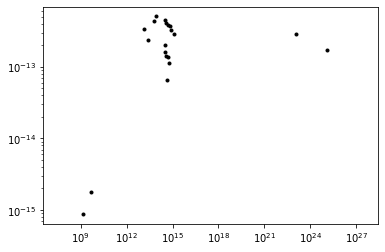

In [84]:
import matplotlib.pyplot as plt

sample = 0

plt.plot(df[sample,:,0], df[sample,:,1], "k.")
#plt.loglog()
plt.xscale('log')
plt.yscale('log')

In [85]:
#df = np.load("seds_blazar_allfreqs.npy")
ones = np.ones((df.shape[0], df.shape[1], 1),dtype="int")



#df_blz = np.reshape(df[:,:,1], (df.shape[0], df.shape[1]) )
#print(zeros.shape, df.shape)
df_blz = np.concatenate([np.expand_dims(df[:,:,1], axis=-1),ones], axis=2)
df_blz.shape

(3561, 486, 2)

In [86]:
df = np.load("seds_agn_allfreqs_max.npy")
zeros = np.zeros((df.shape[0], df.shape[1], 1),dtype="int")



#df_agn = np.reshape(df[:,:,1], (df.shape[0], df.shape[1]) )
#print(zeros.shape, df.shape)
df_agn = np.concatenate([np.expand_dims(df[:,:,-1], axis=-1),zeros], axis=2)
print(df_agn[0,:5])
df_agn.shape

[[2.183e-15 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [4.830e-15 0.000e+00]
 [0.000e+00 0.000e+00]]


(1180, 486, 2)

In [87]:
df = np.concatenate([df_blz,df_agn], axis=0)
df.shape

(4741, 486, 2)

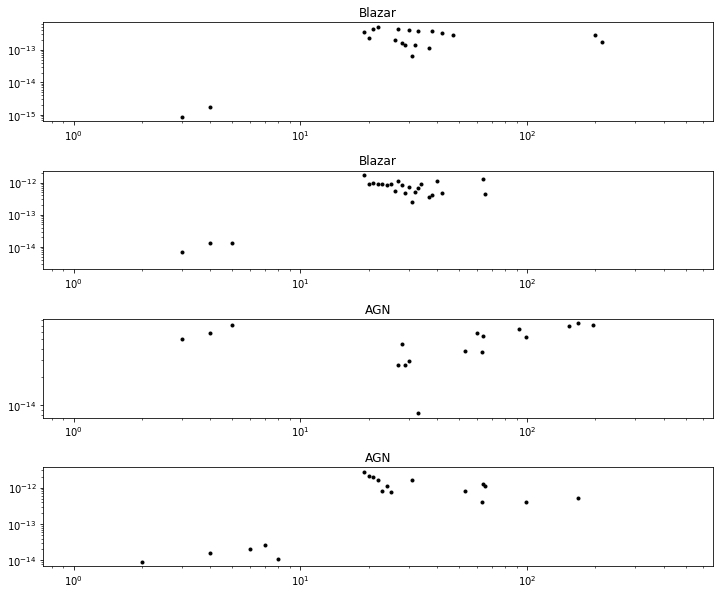

In [88]:

index = [0,1,-1,-2]

plt.figure(figsize=(12,10))

for i in range(1,5):
    plt.subplot(4, 1, i)
    plt.subplots_adjust(hspace=0.5)
    

    plt.plot(df[index[i-1],:,0], "k.")
    if i == 1 or i == 2:
        plt.title("Blazar")
    else:
        plt.title("AGN")
    #plt.loglog()
    plt.xscale('log')
    plt.yscale('log')

In [89]:
df = np.reshape(df, (df.shape[0], df.shape[1], df.shape[2]))
df.shape

(4741, 486, 2)

In [90]:
print(np.max(df[:,:,0]))

6.507e-08


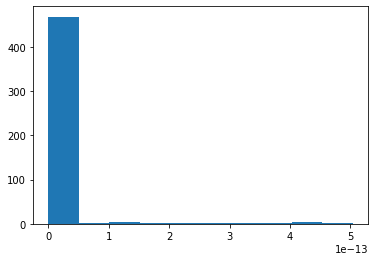

In [91]:
plt.hist(df[0,:,0])
plt.show()

<h1>
    Normalization
</h1>
Consider many options:
-><ul>
  <li>No Normalization</li>
  <li>Sample Normalization</li>
  <li>Feature Normalization</li>
</ul>

In [92]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

df_final_signal = MinMaxScaler().fit_transform(df[:,:,0])
#df_final_signal = StandardScaler().fit_transform(df[:,:,0])
print(df_final_signal.min(), df_final_signal.max())

df_final = np.stack([df_final_signal, df[:,:,-1]], axis=-1)
df_final.shape

0.0 1.0


(4741, 486, 2)

In [93]:
df = df_final

In [25]:
df[:,-1,:]

array([[-0.01452482,  1.        ],
       [-0.01452482,  1.        ],
       [-0.01452482,  1.        ],
       ...,
       [-0.01452482,  0.        ],
       [-0.01452482,  0.        ],
       [-0.01452482,  0.        ]])

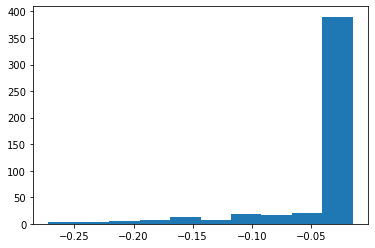

In [25]:
plt.hist(df[0,:,0])
plt.show()

In [94]:
df_x = df[:,:,:1]
df_x.shape

(4741, 486, 1)

In [98]:
df_y = df[:,0,-1]
df_y.shape

(4741,)

In [28]:
np.save("Dados Normalizados.npy",df_x)
np.save("Target.npy", df_y)

In [3]:
import numpy as np

df_x = np.load("Dados Normalizados.npy")
print(df_x.shape)
df_y = np.load("Target.npy")
print(df_y.shape)
df = np.concatenate([df_x, np.expand_dims(df_y,axis=-1)], axis=-1)
#df = np.expand_dims(df, axis = -1)
#df = df.reshape(df.shape[0], 1, df.shape[1], df.shape[2])
print(df.shape)

(4741, 486, 1)
(4741, 486)
(4741, 486, 2)


[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 486, 1)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 486, 64)           256       
_________________________________________________________________
activation_5 (Activation)    (None, 486, 64)           0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 243, 64)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 243, 128)          24704     
_________________________________________________________________
activation_6 (Activation)    (None, 243, 128)          0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 122,

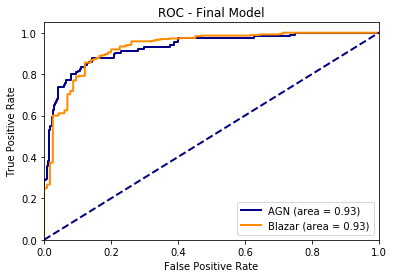

ValueError: Unknown optimizer: RAdam

In [4]:
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" 
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, TensorBoard
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Dense, Input, Bidirectional, Conv2D, Activation, MaxPooling2D, Flatten, Reshape
from keras.layers import Conv1D, MaxPooling1D, SimpleRNN, BatchNormalization,Dropout
from keras.callbacks import ModelCheckpoint
#from keras.utils import multi_gpu_model
from opt import RAdam
from keras import backend as K
K.set_image_dim_ordering('tf')

kf = KFold(n_splits=5)

#df_x = np.load("Dados Normalizados.npy")
#print(df_x.shape)
#df_y = np.load("Target.npy")
#print(df_y.shape)
#df = np.concatenate([df_x, np.expand_dims(df_y,axis=-1)], axis=-1)

np.random.seed(10)
print(df[:5,0,-1])
np.random.shuffle(df)
print(df[:5,0,-1])

split = 1
for percentage in range(1,10):
    if split != 1:
        continue
    else:

        embed_dim = 128
        lstm_out = int(np.floor(486*2))
        batch_size = 256
        activation = 'elu'
        print(split)
        
        inp = Input(shape=(df.shape[1], 1))
        
        x = Conv1D(64, 3, padding='same')(inp)
        #x = BatchNormalization()(x)
        x = Activation(activation)(x)
        #x = BatchNormalization()(x)
        x = MaxPooling1D(2, padding='same')(x)
        
        x = Conv1D(128, 3, padding='same')(x)
        #x = BatchNormalization()(x)
        x = Activation(activation)(x)
        #x = BatchNormalization()(x)
        x = MaxPooling1D(2, padding='same')(x)
        
        x = Conv1D(256, 3, padding='same')(x)
        #x = BatchNormalization()(x)
        x = Activation(activation)(x)
        #x = BatchNormalization()(x)
        x = MaxPooling1D(2, padding='same')(x)
        
        x = Conv1D(512, 3, padding='same')(x)
        #x = BatchNormalization()(x)
        x = Activation(activation)(x)
        #x = BatchNormalization()(x)
        x = MaxPooling1D(2, padding='same')(x)
        
        
    
        x = Bidirectional(LSTM(lstm_out, return_sequences=False), merge_mode="concat")(x)

        x = Dense(lstm_out//2, activation=activation)(x)
        x = Dense(lstm_out//2, activation=activation)(x)
       
    
        x = Dense(2,activation='softmax')(x)
        

        model = Model(inp, x)
        #parallel_model = multi_gpu_model(model, gpus=5)
        parallel_model = model
        parallel_model.compile(loss = 'categorical_crossentropy', optimizer=RAdam() ,metrics = ['accuracy'])
        print(parallel_model.summary())
        

        X_train, X_test, Y_train, Y_test = train_test_split(df[:,:,:-1], df[:,0,-1], test_size = 0.10, random_state = 7)
        
        
        Y_test_binalized = np.zeros((Y_test.shape[0],2), dtype="float32")

        for i in range(Y_test.shape[0]):
            if Y_test[i] == 0.:
                Y_test_binalized[i,0] = 1.
            else:
                Y_test_binalized[i,1] = 1.
        
        Y_train_binalized = np.zeros((Y_train.shape[0],2), dtype="float32")

        for i in range(Y_train.shape[0]):
            if Y_train[i] == 0.:
                Y_train_binalized[i,0] = 1.
            else:
                Y_train_binalized[i,1] = 1.
                
        
        
                
        #print(Y_train_binalized.shape)
        #tensorboard = TensorBoard(log_dir=f'./fold{split}')
        
        check = ModelCheckpoint("Final_Model_RAdam.hdf5", monitor="val_loss", verbose=1, save_best_only=True)

        history = parallel_model.fit(X_train, Y_train_binalized, batch_size =batch_size*1, epochs = 100,  
                       verbose = 1, validation_data=(X_test, Y_test_binalized), callbacks=[check])

        
        
        pred = parallel_model.predict(X_test)
    
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(2):
            fpr[i], tpr[i], _ = roc_curve(Y_test_binalized[:, i], pred[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])


        plt.figure()
        lw = 2
        colors = ['darkblue','darkorange']
        classes = ['AGN','Blazar']
        for i in range(2):
            plt.plot(fpr[i], tpr[i], color=colors[i],
                     lw=lw, label=f'{classes[i]} (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC - Final Model')
        plt.legend(loc="lower right")
        #plt.savefig(f'Train_Test/ROC-NO LSTM.jpg')
        plt.show()
        
        from keras.models import load_model

        parallel_model = load_model("Final_Model_RAdam.hdf5") 

        pred = parallel_model.predict(X_test)



        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(2):
            fpr[i], tpr[i], _ = roc_curve(Y_test_binalized[:, i], pred[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])


        plt.figure()
        lw = 2
        colors = ['darkblue','darkorange']
        classes = ['AGN','Blazar']
        for i in range(2):
            plt.plot(fpr[i], tpr[i], color=colors[i],
                     lw=lw, label=f'{classes[i]} (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC - Final Model')
        plt.legend(loc="lower right")
        #plt.savefig(f'Train_Test/ROC-NO LSTM.jpg')
        plt.show()

        

        split += 1

/home/schubert/anaconda3/envs/DL/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/home/schubert/anaconda3/envs/DL/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


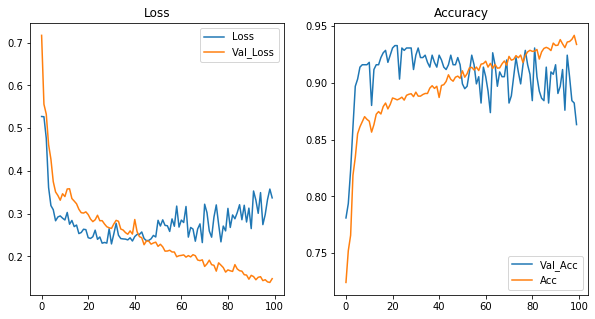

In [174]:
plot = plt.figure(figsize=(10,5))
for key in history.history.keys():
    if "loss" in key:
        g=plot.add_subplot(1,2,1)
        plt.plot(history.history[key])
        plt.title("Loss")
        plt.legend(["Loss","Val_Loss"])
    else:
        plot.add_subplot(1,2,2)
        plt.plot(history.history[key])
        plt.title("Accuracy")
        plt.legend(["Val_Acc","Acc"])
        

plt.savefig("paper/loss_acc.png")        
plt.show()

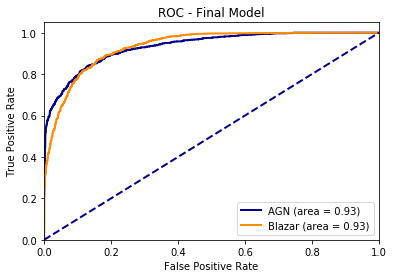

In [175]:
pred = parallel_model.predict(X_train)
        
       
    
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_train_binalized[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
lw = 2
colors = ['darkblue','darkorange']
classes = ['AGN','Blazar']
for i in range(2):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             lw=lw, label=f'{classes[i]} (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC - Final Model')
plt.legend(loc="lower right")
#plt.savefig(f'Train_Test/ROC-NO LSTM.jpg')
plt.show()


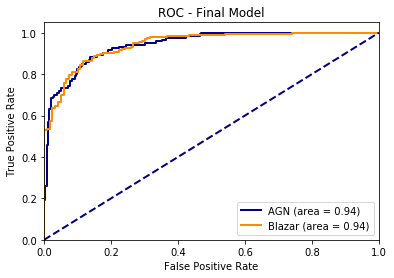

In [22]:
from keras.models import load_model


parallel_model = load_model("Final_Model.hdf5") 

pred = parallel_model.predict(X_test)
        
       
    
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binalized[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
lw = 2
colors = ['darkblue','darkorange']
classes = ['AGN','Blazar']
for i in range(2):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             lw=lw, label=f'{classes[i]} (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC - Final Model')
plt.legend(loc="lower right")
#plt.savefig(f'paper/ROC-Final Model.jpg')
plt.show()


Average precision score, micro-averaged over all classes: 0.98


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.98')

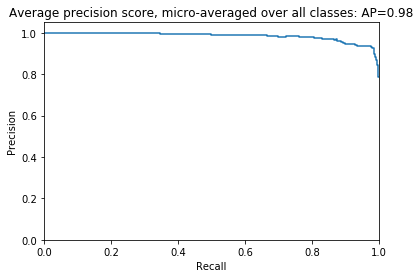

In [178]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(Y_test_binalized[:, i], pred[:, i])
    average_precision[i] = average_precision_score(Y_test_binalized[:, i], pred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test_binalized[:, i].ravel(), pred[:, i].ravel())
average_precision["micro"] = average_precision_score(Y_test_binalized[:, i], pred[:, i],
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

/home/schubert/anaconda3/envs/DL/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fedc2c34f60>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


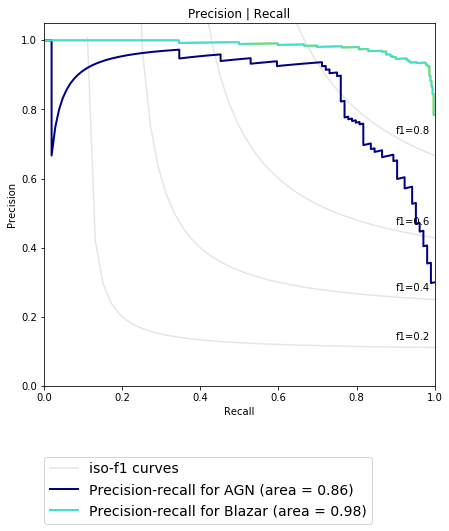

In [179]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(2), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for {0} (area = {1:0.2f})'
                  ''.format(classes[i], average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision | Recall')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))
plt.savefig("paper/precision_recall.png")


plt.show()

In [201]:
df_y = df[:,0,1:]
df_y.shape

(4741, 1)

In [202]:
Y = np.zeros((df_y.shape[0],2), dtype="float32")

for i in range(df_y.shape[0]):
    if df_y[i] == 0.:
        Y[i,0] = 1.
    else:
        Y[i,1] = 1.
Y.shape

(4741, 2)

In [203]:
columns = pd.MultiIndex.from_tuples([("Y",c) for c in ["AGN","BLAZAR", "PRED_AGN", "PRED_BLAZAR"]])
class_pred = pd.DataFrame(data= np.concatenate([Y, pred_data], axis=-1) , columns= columns)
class_pred.head(5)

Y                             
   AGN BLAZAR  PRED_AGN PRED_BLAZAR
0  1.0    0.0  0.161769    0.838231
1  0.0    1.0  0.001619    0.998381
2  0.0    1.0  0.003000    0.997000
3  0.0    1.0  0.272850    0.727150
4  0.0    1.0  0.002350    0.997650

In [204]:
columns = pd.MultiIndex.from_tuples([("X","") for c in range(df.shape[1])])
data = pd.DataFrame(data = df[:,:,0], columns = columns)
data.head(5)

X                                                                 \
                                                                             
0  0.000000  0.0  0.000000  0.000264  0.003439  0.000000  0.000000  0.0000   
1  0.005502  0.0  0.000000  0.000446  0.006167  0.005992  0.000000  0.0000   
2  0.000000  0.0  0.006901  0.000000  0.006117  0.000000  0.037392  0.0498   
3  0.009874  0.0  0.000000  0.000475  0.006625  0.005975  0.000000  0.0000   
4  0.000000  0.0  0.006335  0.000000  0.007201  0.000000  0.000000  0.0000   

                       ...                                                    
                       ...                                                    
0  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.050805  0.018721  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.044673  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 486 columns]

In [205]:
data_export = pd.concat([data, class_pred], axis=1)

In [206]:
data_export.head(5)

X                                                                 \
                                                                             
0  0.000000  0.0  0.000000  0.000264  0.003439  0.000000  0.000000  0.0000   
1  0.005502  0.0  0.000000  0.000446  0.006167  0.005992  0.000000  0.0000   
2  0.000000  0.0  0.006901  0.000000  0.006117  0.000000  0.037392  0.0498   
3  0.009874  0.0  0.000000  0.000475  0.006625  0.005975  0.000000  0.0000   
4  0.000000  0.0  0.006335  0.000000  0.007201  0.000000  0.000000  0.0000   

                       ...                                  Y         \
                       ...                                AGN BLAZAR   
0  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0    0.0   
1  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0   
2  0.050805  0.018721  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0   
3  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0   
4  0.044673  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0   

                         
   PRED_AGN PRED_BLAZAR  
0  0.161769    0.838231  
1  0.001619    0.998381  
2  0.003000    0.997000  
3  0.272850    0.727150  
4  0.002350    0.997650  

[5 rows x 490 columns]

In [207]:
data_export.to_csv("paper/x-y-preds.csv")

In [53]:
batch_size = 256
for i in range((df.shape[0] // batch_size) + 1):
    print((df.shape[0] // batch_size) - i)
    if (i+1)*batch_size < df.shape[0]:
        X = np.copy(df[i*batch_size:(i+1)*batch_size,:,:])
    else:
        X = np.copy(df[i*batch_size:,:,:])
    #print(X.shape)
    #X = X.reshape((1 ,X.shape[0],X.shape[1]))
    #print(X.shape)
    #X = list(X)
    model = parallel_model
    gradient = K.gradients([model.output], [model.input])[0]
    print(gradient)
    iterate = K.function([model.input], [gradient])
    print(iterate)
    grad = iterate([X])
    #print(grad, np.array(grad).shape)
    g= np.array(grad)
    print(g.shape)
    g= g.reshape((g.shape[1], g.shape[2],g.shape[3]))
    #print(g.shape)
    break
    if i == 0:
        g_final = g
    else:
        g_final = np.concatenate([g_final, g], axis=0)
print("Done")
print(g_final.shape)

18
Tensor("gradients_1/conv1d_37_3/convolution/ExpandDims_grad/Reshape:0", shape=(?, 486, 1), dtype=float32)
(1, 256, 486, 1)
Done


NameError: name 'g_final' is not defined

In [47]:
df[1,:10]

array([[1.16211676e-02, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [6.81081081e-04, 1.00000000e+00],
       [4.84645252e-03, 1.00000000e+00],
       [4.60476355e-03, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [55]:
g[1,:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [42]:
np.save("test-dx.npy", g)
dx = np.load("test-dx.npy")

In [48]:
dx[1,:]

array([[ 2.16392362e-08,  1.89288336e-08],
       [ 2.21487362e-09,  4.50654930e-10],
       [ 2.59631516e-08,  5.25555492e-08],
       [ 4.57004283e-08,  9.22293852e-10],
       [-6.18161806e-08, -2.17760387e-09],
       [ 1.71323329e-08,  1.56084159e-08],
       [ 3.25590910e-09, -9.20297616e-09],
       [-6.31311625e-09,  1.09875211e-08],
       [ 3.07214965e-09,  7.29665972e-09],
       [ 1.22058204e-08,  3.21998828e-09],
       [-2.32640378e-08, -3.33998429e-08],
       [-2.03580566e-08, -2.95760927e-08],
       [-2.09635260e-08, -1.43577026e-08],
       [-3.35490213e-09, -9.18673493e-09],
       [-7.22921190e-09, -7.44511830e-09],
       [ 3.51626950e-10, -5.67538549e-09],
       [-6.26000141e-09, -2.78469958e-09],
       [ 8.61559979e-09, -4.99171104e-09],
       [ 6.30405284e-09,  4.08643714e-08],
       [ 3.67813975e-08,  1.98799341e-08],
       [-1.29101556e-08, -3.50673240e-10],
       [ 3.87123356e-09,  4.36915082e-09],
       [-1.08096216e-08, -5.90107918e-09],
       [-2.

In [250]:
np.save("paper/Partial Derivatives.npy", g_final)

In [49]:
dx = np.load("paper/Partial Derivatives.npy")
dx.shape

(4741, 486, 1)

(0.7340284840250979, 660.73730182849, 3.693421927847978e-16, 3.6981591236608305e-12)


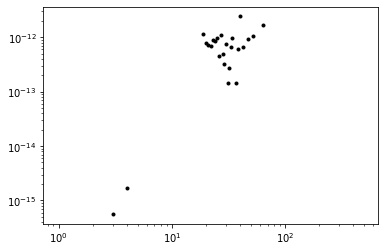

In [251]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df_nn = np.load("Dados Normalizados_NN.npy")

plt.plot(df_nn[4,:,0], "k.")
plt.xscale('log')
plt.yscale('log')
axis = plt.axis()
print(axis)

[]

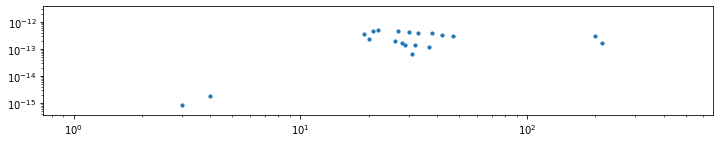

In [252]:
fig = plt.figure(figsize=(12,2))
plt.scatter([i for i in range(df_nn.shape[1])], df_nn[0,:,0], s = 10)
plt.xlim(axis[0], axis[1])
plt.ylim(axis[2], axis[3])
plt.loglog()

In [253]:
from IPython.display import clear_output


df_y = np.load("Target.npy")
X_plot = df_nn
range_ = [i for i in range(df_nn.shape[1])]
for idx in range(X_plot.shape[0]):
    print(X_plot.shape[0] - idx)
    
    if False:
        continue
    else:
        plt.plot(X_plot[idx,:,0], "k.")
        plt.xscale('log')
        plt.yscale('log')
        axis = plt.axis()
        plt.clf()

        fig = plt.figure(figsize=(15,2))
        #plt.style.use('classic')
        classes = ["AGN", "Blazar"]
        plt.scatter(range_, X_plot[idx,:,0], s = 20, c = g_final[idx,:,0], cmap='Reds')
        plt.title(f"Sample: {idx} | Class: {classes[int(df_y[idx,0])]}" )
        plt.xlim(axis[0], axis[1])
        plt.ylim(axis[2], axis[3])
        plt.loglog()
        plt.colorbar()
        plt.savefig(f"paper/Map_of_Attention/Sample: {idx} | Class: {classes[int(df_y[idx,0])]}.png")
        plt.clf()
    clear_output()


<Figure size 432x288 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>